This code is use ReLU, ACC:0.15

there is use tanh Impove Version (but looks like acc didn't get more well)：https://colab.research.google.com/drive/1RdoYiu1JsQ1Xtw2fZTtvi6nmC071j0Na?usp=sharing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import struct
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows*cols)
        return images / 255.0

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# 載入前 500 筆訓練與 200 筆測試資料
X_train = load_mnist_images("train-images.idx3-ubyte___")[:500]
y_train = load_mnist_labels("train-labels.idx1-ubyte___")[:500]
X_test = load_mnist_images("t10k-images.idx3-ubyte___")[:200]
y_test = load_mnist_labels("t10k-labels.idx1-ubyte___")[:200]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(500, 784) (500,) (200, 784) (200,)


In [3]:
# 激活函數實作
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softplus(x):
    return np.log(1 + np.exp(x))

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# Softmax
def softmax(a):
    exp_a = np.exp(a - np.max(a, axis=1, keepdims=True))
    return exp_a / np.sum(exp_a, axis=1, keepdims=True)

# One-hot encoding
def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

# Cross-entropy loss
def cross_entropy(y_pred, y_true):
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / y_pred.shape[0]


In [4]:
def forward_pass(X, weights, activations):
    z = X
    for W, activation in zip(weights, activations):
        z = activation(np.dot(z, W))
    return z


In [5]:
np.random.seed(42)
input_size = 784
hidden1 = 64
hidden2 = 32
output_size = 10

W1 = np.random.randn(input_size, hidden1) * 0.01
W2 = np.random.randn(hidden1, hidden2) * 0.01
W3 = np.random.randn(hidden2, output_size) * 0.01

weights = [W1, W2, W3]
activations = [relu, relu, softmax]


In [6]:
# forward pass
y_pred_proba = forward_pass(X_test, weights, activations)
y_pred = np.argmax(y_pred_proba, axis=1)


In [7]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

def compute_detailed_metrics(y_true, y_pred, num_classes=10):
    mcm = multilabel_confusion_matrix(y_true, y_pred, labels=range(num_classes))
    overall_correct = 0

    for i, matrix in enumerate(mcm):
        tn, fp, fn, tp = matrix.ravel()
        precision = tp / (tp + fp + 1e-10)
        recall = tp / (tp + fn + 1e-10)
        f1 = 2 * precision * recall / (precision + recall + 1e-10)

        print(f"Class {i}:")
        print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print()

    overall_accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {overall_accuracy:.4f}")

# 呼叫上面這個函數, 將 y_pred_labels 改為 y_pred
compute_detailed_metrics(y_test, y_pred)

Class 0:
TP: 11, FP: 64, FN: 6, TN: 119
Precision: 0.1467
Recall: 0.6471
F1 Score: 0.2391

Class 1:
TP: 0, FP: 1, FN: 28, TN: 171
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class 2:
TP: 2, FP: 9, FN: 14, TN: 175
Precision: 0.1818
Recall: 0.1250
F1 Score: 0.1481

Class 3:
TP: 0, FP: 0, FN: 16, TN: 184
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class 4:
TP: 1, FP: 2, FN: 27, TN: 170
Precision: 0.3333
Recall: 0.0357
F1 Score: 0.0645

Class 5:
TP: 0, FP: 7, FN: 20, TN: 173
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class 6:
TP: 0, FP: 0, FN: 20, TN: 180
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class 7:
TP: 16, FP: 87, FN: 8, TN: 89
Precision: 0.1553
Recall: 0.6667
F1 Score: 0.2520

Class 8:
TP: 0, FP: 0, FN: 10, TN: 190
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class 9:
TP: 0, FP: 0, FN: 21, TN: 179
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Overall Accuracy: 0.1500


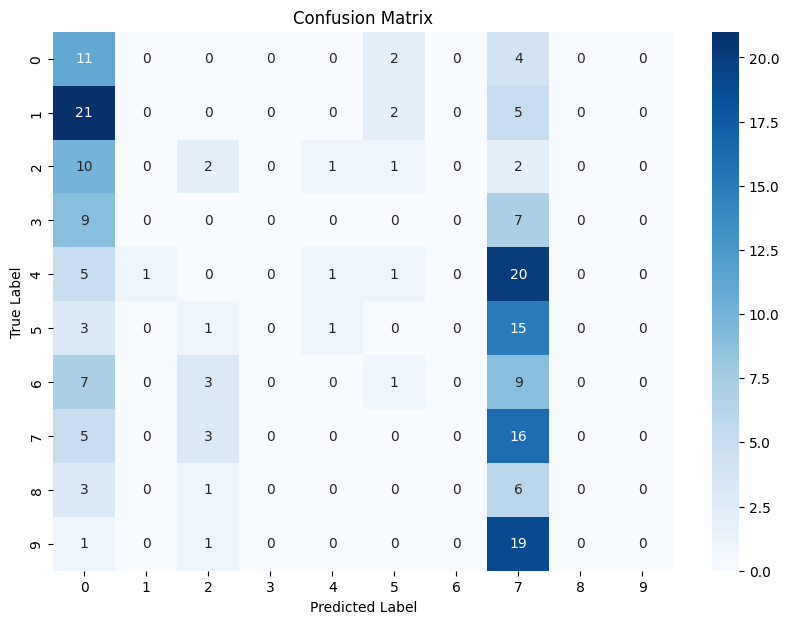

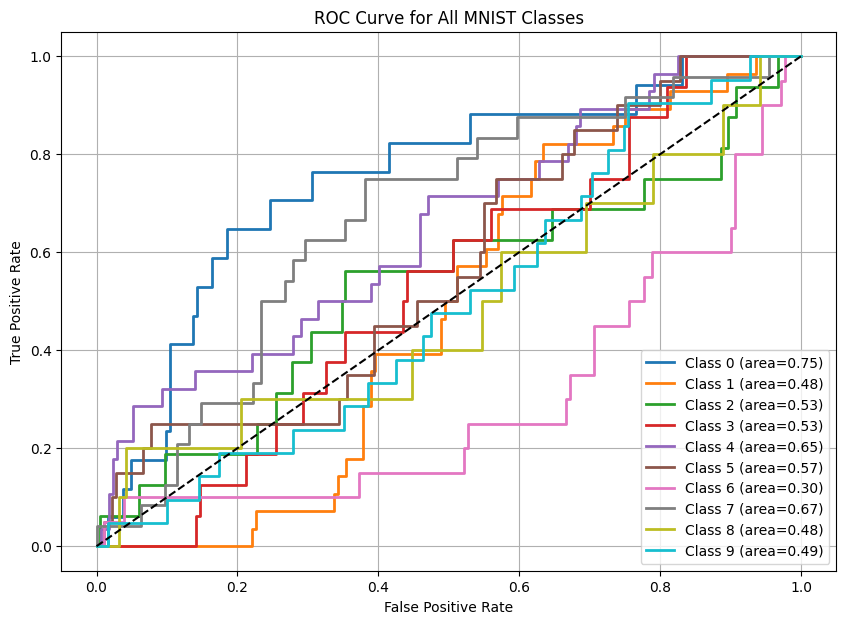

              precision    recall  f1-score   support

           0     0.1467    0.6471    0.2391        17
           1     0.0000    0.0000    0.0000        28
           2     0.1818    0.1250    0.1481        16
           3     0.0000    0.0000    0.0000        16
           4     0.3333    0.0357    0.0645        28
           5     0.0000    0.0000    0.0000        20
           6     0.0000    0.0000    0.0000        20
           7     0.1553    0.6667    0.2520        24
           8     0.0000    0.0000    0.0000        10
           9     0.0000    0.0000    0.0000        21

    accuracy                         0.1500       200
   macro avg     0.0817    0.1474    0.0704       200
weighted avg     0.0923    0.1500    0.0714       200

Overall Accuracy: 0.1500


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC 曲線
y_test_oh = one_hot(y_test)
plt.figure(figsize=(10, 7))

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_oh[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for All MNIST Classes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# 分類報告 (precision, recall, F1, accuracy)
report = classification_report(y_test, y_pred, digits=4)
print(report)

accuracy = np.mean(y_pred == y_test)
print(f"Overall Accuracy: {accuracy:.4f}")
